# Анализ датасета "Насилие в отношении женщин и девочек"

**Record ID** Числовое значение, уникальное для каждого вопроса по стране

**Country**	Страна, в которой проводился опрос

**Gender**	Являлись ли респонденты мужчинами или женщинами.

**Demographics Question**	Относится к различным типам демографических групп, используемых для сегментации респондентов - семейное положение, уровень образования, статус занятости, тип проживания или возраст.

**Demographics Response**	Означает демографический сегмент, в который попадает респондент (например, возрастные группы делятся на 15-24, 25-34 и 35-49 лет).

**Survey Year**	Год, в котором проводилось обследование демографии и здоровья (ОДЗ). "Обследования DHS - это национально репрезентативные обследования домашних хозяйств, которые предоставляют данные для широкого спектра показателей мониторинга и оценки воздействия в области народонаселения, здоровья и питания. Стандартные обследования DHS имеют большой размер выборки (обычно от 5 000 до 30 000 домохозяйств) и обычно проводятся примерно раз в 5 лет, что позволяет проводить сравнение во времени."

**Value**	% опрошенных в соответствующей группе, согласных с вопросом (например, процент женщин в возрасте 15-24 лет в Афганистане, согласных с тем, что муж имеет право ударить или избить свою жену, если она поджигает еду).

**Вопрос | Респондентов спросили, согласны ли они со следующими утверждениями:**

Муж имеет право бить или избивать жену, если она поджигает еду

Муж имеет право бить или избивать свою жену, если она спорит с ним

Муж имеет право бить или избивать свою жену, если она уходит из дома, не предупредив его

Муж имеет право бить или избивать свою жену, если она не заботится о детях

Муж имеет право бить или избивать свою жену, если она отказывается заниматься с ним сексом

Муж имеет право бить или избивать свою жену по крайней мере по одной конкретной причине

In [337]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import scipy.stats
import numpy as np

warnings.filterwarnings('ignore')

In [338]:
df = pd.read_csv("Violence Against Women  Girls Data.csv", sep = ',')
df.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8


In [339]:
df.tail()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
12595,210,Zimbabwe,M,Residence,Urban,... if she goes out without telling him,01/01/2015,11.8
12596,280,Zimbabwe,M,Residence,Rural,... if she neglects the children,01/01/2015,20.1
12597,280,Zimbabwe,M,Residence,Urban,... if she neglects the children,01/01/2015,15.0
12598,350,Zimbabwe,M,Residence,Rural,... if she refuses to have sex with him,01/01/2015,7.2
12599,350,Zimbabwe,M,Residence,Urban,... if she refuses to have sex with him,01/01/2015,3.7


In [340]:
df.columns #были выведены все столбцы

Index(['RecordID', 'Country', 'Gender', 'Demographics Question',
       'Demographics Response', 'Question', 'Survey Year', 'Value'],
      dtype='object')

In [341]:
df.shape #в датасете 12600 рядов и 8 колонок

(12600, 8)

In [342]:
df.info() #в столбце value есть пропущенные значения, в этом датасете тип данных: строки, вещественные числа и целые числа

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               12600 non-null  int64  
 1   Country                12600 non-null  object 
 2   Gender                 12600 non-null  object 
 3   Demographics Question  12600 non-null  object 
 4   Demographics Response  12600 non-null  object 
 5   Question               12600 non-null  object 
 6   Survey Year            12600 non-null  object 
 7   Value                  11187 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 787.6+ KB


In [343]:
df['Country'].unique() #все страны в датасете

array(['Afghanistan', 'Albania', 'Angola', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Benin', 'Bolivia', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Chad', 'Colombia', 'Comoros', 'Congo',
       'Congo Democratic Republic', "Cote d'Ivoire", 'Dominican Republic',
       'Egypt', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia',
       'Ghana', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'India', 'Indonesia', 'Jordan', 'Kenya', 'Kyrgyz Republic',
       'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Maldives', 'Mali',
       'Moldova', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal',
       'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Peru', 'Philippines',
       'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone',
       'South Africa', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo',
       'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine', 'Yemen', 'Zambia',
       'Zimbabwe'], dtype=object)

In [344]:
df['Gender'].unique() #и женщины, и мужчины принимали участие в опросе

array(['F', 'M'], dtype=object)

In [345]:
df[['Country', 'Gender', 'Question']]

,Country,Gender,Question
0,Afghanistan,F,... if she burns the food
1,Afghanistan,F,... if she burns the food
2,Afghanistan,F,... if she burns the food
3,Afghanistan,F,... if she burns the food
4,Afghanistan,F,... if she burns the food
...,...,...,...
12595,Zimbabwe,M,... if she goes out without telling him
12596,Zimbabwe,M,... if she neglects the children
12597,Zimbabwe,M,... if she neglects the children
12598,Zimbabwe,M,... if she refuses to have sex with him


In [346]:
df.iloc[1050]['Question']

'... if she neglects the children'

In [347]:
df[df['Demographics Question'] == 'Marital status'].shape

(2520, 8)

In [348]:
#2520 строк, в которых людям задали вопрос про семейное положение

In [349]:
df[(df['Demographics Question'] == 'Marital status') 
   & (df['Demographics Response'] == 'Married or living together')].shape

(840, 8)

In [350]:
#840 реподентов ответили, что они замужем или живут вместе

In [351]:
df[~((df['Demographics Question'] == 'Marital status') 
     & (df['Demographics Response'] == 'Married or living together'))].shape

(11760, 8)

In [352]:
#все вопросы кроме вопросов про семейное положение и все ответы респондентов кроме 'женаты или живут вместе'

In [353]:
df[df['Value'].isna()].shape

(1413, 8)

In [354]:
#только те ряды, в которых пропущено значение value

In [355]:
df[df['Demographics Response'].isin(['Married or living together', 'Widowed, divorced, separated'])].shape

(1680, 8)

In [356]:
#записи ответов тех респодентов, кто женат или живут вместе или вдов, разведенных, разлученных

In [357]:
df[df['Value'].isin(range(70,100))].shape

(16, 8)

отфильтрованы 16 рядов, в которых высокое значение % опрошенных в соответствующей группе, которые согласны с вопросом и оправдывают насилие по этой причине

In [358]:
df['Value'].sort_values(ascending=False) #пропущенные значения не сортируются, самое максимальное значение % опрошенных в соответствующей группе, которые согласны с вопросом = 86.9

66       86.9
7783     86.1
11023    85.2
7423     83.3
3666     82.8
         ... 
12235     NaN
12236     NaN
12237     NaN
12238     NaN
12239     NaN
Name: Value, Length: 12600, dtype: float64

In [359]:
df.sort_values(by=['Value'],ascending=False)

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
66,351,Afghanistan,F,Employment,Employed for kind,... for at least one specific reason,01/01/2015,86.9
7783,394,Morocco,F,Employment,Employed for kind,... for at least one specific reason,01/01/2003,86.1
11023,412,Timor-Leste,F,Employment,Employed for kind,... for at least one specific reason,01/01/2016,85.2
7423,392,Mali,F,Employment,Employed for kind,... for at least one specific reason,01/01/2018,83.3
3666,371,Eritrea,F,Employment,Employed for kind,... for at least one specific reason,01/01/2002,82.8
...,...,...,...,...,...,...,...,...
12235,208,Yemen,M,Residence,Urban,... if she goes out without telling him,01/01/2013,NaN
12236,278,Yemen,M,Residence,Rural,... if she neglects the children,01/01/2013,NaN
12237,278,Yemen,M,Residence,Urban,... if she neglects the children,01/01/2013,NaN
12238,348,Yemen,M,Residence,Rural,... if she refuses to have sex with him,01/01/2013,NaN


In [360]:
df.drop('Survey Year', axis = 1)

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,13.8
...,...,...,...,...,...,...,...
12595,210,Zimbabwe,M,Residence,Urban,... if she goes out without telling him,11.8
12596,280,Zimbabwe,M,Residence,Rural,... if she neglects the children,20.1
12597,280,Zimbabwe,M,Residence,Urban,... if she neglects the children,15.0
12598,350,Zimbabwe,M,Residence,Rural,... if she refuses to have sex with him,7.2


In [361]:
df.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8


In [362]:
pd.to_datetime(df['Survey Year'], dayfirst=True).dt.date

0        2015-01-01
1        2015-01-01
2        2015-01-01
3        2015-01-01
4        2015-01-01
            ...    
12595    2015-01-01
12596    2015-01-01
12597    2015-01-01
12598    2015-01-01
12599    2015-01-01
Name: Survey Year, Length: 12600, dtype: object

In [363]:
df['Survey Year'] = pd.to_datetime(df['Survey Year']).dt.year

In [364]:
df[df['Survey Year'] == 2018].shape #самое крайнее исследование проводилось в 2018 году

(360, 8)

<AxesSubplot:xlabel='Survey Year'>

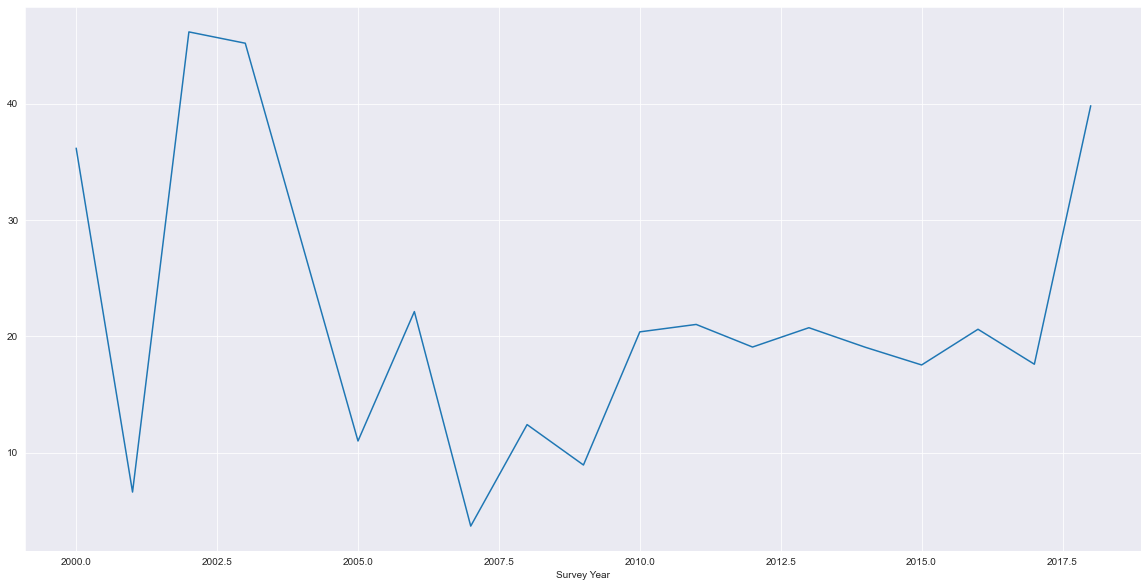

In [365]:
df.groupby(df['Survey Year'])['Value'].mean().plot(figsize = (20, 10)) # строим график, отображающий средний показатель согласия с течением времени

In [366]:
# Создаем из значений столбца Value новый столбец Value_categories, который отображает категориальный тип согласия с насилием 
def categories(value):
    if value <= 30:
        return 'Малый процент согласия'
    elif value <= 50:
        return 'Средний процент согласия'
    elif value <= 80:
        return 'Большой процент согласия'
    elif value <= 100:
        return 'Наивысший процент принятия'
    else:
        return value
    
df['Value_categories'] = df['Value'].apply(categories) # применяем ранее написанную функцию для создания нового столбца с типами согласия
df = df.dropna() # удаляем значения NaN из общего датафрейма
df # вывод датафрейма для проверки, что все сработало


,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value,Value_categories
1,1,Afghanistan,F,Education,Higher,... if she burns the food,2015,10.1,Малый процент согласия
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,2015,13.7,Малый процент согласия
3,1,Afghanistan,F,Education,Primary,... if she burns the food,2015,13.8,Малый процент согласия
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,2015,13.8,Малый процент согласия
5,1,Afghanistan,F,Employment,Employed for kind,... if she burns the food,2015,17.0,Малый процент согласия
...,...,...,...,...,...,...,...,...,...
12595,210,Zimbabwe,M,Residence,Urban,... if she goes out without telling him,2015,11.8,Малый процент согласия
12596,280,Zimbabwe,M,Residence,Rural,... if she neglects the children,2015,20.1,Малый процент согласия
12597,280,Zimbabwe,M,Residence,Urban,... if she neglects the children,2015,15.0,Малый процент согласия
12598,350,Zimbabwe,M,Residence,Rural,... if she refuses to have sex with him,2015,7.2,Малый процент согласия


<AxesSubplot:xlabel='Question'>

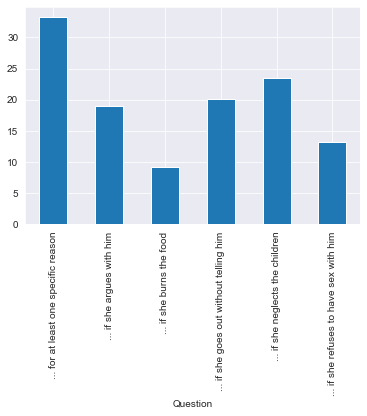

In [367]:
df.groupby(['Question'])['Value'].mean().plot(kind = 'bar')

In [368]:
# создадим новый датафрейм, который будет содержать три страны: Афганистан, Украину и Азербайджан
df_countries = df[(df['Country'] == 'Afghanistan') | (df['Country'] == 'Ukraine') | (df['Country'] == 'Azerbaijan')]
df_countries

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value,Value_categories
1,1,Afghanistan,F,Education,Higher,... if she burns the food,2015,10.1,Малый процент согласия
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,2015,13.7,Малый процент согласия
3,1,Afghanistan,F,Education,Primary,... if she burns the food,2015,13.8,Малый процент согласия
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,2015,13.8,Малый процент согласия
5,1,Afghanistan,F,Employment,Employed for kind,... if she burns the food,2015,17.0,Малый процент согласия
...,...,...,...,...,...,...,...,...,...
12055,207,Ukraine,M,Residence,Urban,... if she goes out without telling him,2007,3.9,Малый процент согласия
12056,277,Ukraine,M,Residence,Rural,... if she neglects the children,2007,10.5,Малый процент согласия
12057,277,Ukraine,M,Residence,Urban,... if she neglects the children,2007,8.4,Малый процент согласия
12058,347,Ukraine,M,Residence,Rural,... if she refuses to have sex with him,2007,2.7,Малый процент согласия


<AxesSubplot:ylabel='Value'>

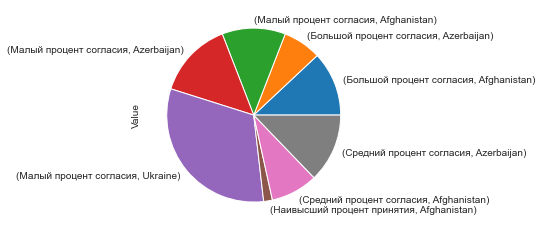

In [369]:
# строим график на основе новых категорий и рассматриваемых стран
df_countries.groupby(['Value_categories', 'Country'])['Value'].count().plot(kind = 'pie')

In [370]:
df['Demographics Question'].unique() # определим категории вопросов

array(['Education', 'Marital status', 'Employment', 'Age', 'Residence'],
      dtype=object)

In [371]:
df1 = df[(df['Demographics Question'] == 'Marital status')] #создаем новый датафрейм, который содержит только вопрос Marital status
df2 = df[(df['Demographics Question'] == 'Education')] #создаем новый датафрейм, который содержит только вопрос Education
df3 = df[(df['Demographics Question'] == 'Employment')] #создаем новый датафрейм, который содержит только вопрос Employment
df4 = df[(df['Demographics Question'] == 'Age')] #создаем новый датафрейм, который содержит только вопрос Age
df5 = df[(df['Demographics Question'] == 'Residence')] #создаем новый датафрейм, который содержит только вопрос Residence


## 1. Проведем анализ ответов на вопрос "Marital status"
#### Гипотеза: Те, кто не был в браке, либо уже не состоит в нем, в среднем меньше одобряют насилие над женщинами

In [372]:
df1
df1['Demographics Response'].unique()
# df1 = df1.dropna(subset=['Value'])
# array(['Widowed, divorced, separated', 'Married or living together',
#        'Never married'], dtype=object)
# df1_sorted = df1.sort_values(by = 'Value', ascending = False)
# df1_sorted

df1_group = df1.groupby(['Question', 'Country', 'Demographics Response'])['Value'].max()
# df1_11 = df1[((df1['Demographics Response'] == 'Widowed, divorced, separated') & (df1['Country'] == 'Azerbaijan'))]
# df1_11['Value'].hist()

In [373]:
df1_group = df1.groupby(['Question', 'Country'])['Value'].mean()
df1_group

Question                                 Country    
... for at least one specific reason     Afghanistan    67.400000
                                         Albania        11.866667
                                         Angola         23.600000
                                         Armenia        18.650000
                                         Azerbaijan     52.750000
                                                          ...    
... if she refuses to have sex with him  Uganda         15.533333
                                         Ukraine         1.350000
                                         Yemen          31.766667
                                         Zambia         19.950000
                                         Zimbabwe        9.700000
Name: Value, Length: 415, dtype: float64

In [374]:
# Создаем отдельно датафрейм df_reason, который показывает наиболее принимаемую причину рукоприкладства в каждой стране в зависимости от пола
df_reason = df1.groupby(['Country', 'Gender', 'Demographics Response'])['Value'].max()
# функцией merge по методу inner объединяем df_reason с исходным датафреймом df1, чтобы получить причины, которые наиболее принимаемы для конкретных стран, пола и семейного положения
df_main_reason = pd.merge(df1, df_reason, how = 'inner', left_on = ['Country', 'Gender', 'Demographics Response', 'Value'], right_on = ['Country', 'Gender', 'Demographics Response', 'Value'])
df_main_reason


,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value,Value_categories
0,351,Afghanistan,F,Marital status,Married or living together,... for at least one specific reason,2015,80.6,Наивысший процент принятия
1,351,Afghanistan,F,Marital status,"Widowed, divorced, separated",... for at least one specific reason,2015,67.6,Большой процент согласия
2,351,Afghanistan,M,Marital status,Married or living together,... for at least one specific reason,2015,72.6,Большой процент согласия
3,351,Afghanistan,M,Marital status,"Widowed, divorced, separated",... for at least one specific reason,2015,48.8,Средний процент согласия
4,352,Albania,F,Marital status,Married or living together,... for at least one specific reason,2017,7.9,Малый процент согласия
...,...,...,...,...,...,...,...,...,...
376,420,Zimbabwe,F,Marital status,Never married,... for at least one specific reason,2015,44.6,Средний процент согласия
377,420,Zimbabwe,F,Marital status,"Widowed, divorced, separated",... for at least one specific reason,2015,33.2,Средний процент согласия
378,420,Zimbabwe,M,Marital status,Married or living together,... for at least one specific reason,2015,24.6,Малый процент согласия
379,420,Zimbabwe,M,Marital status,Never married,... for at least one specific reason,2015,42.4,Средний процент согласия


<AxesSubplot:>

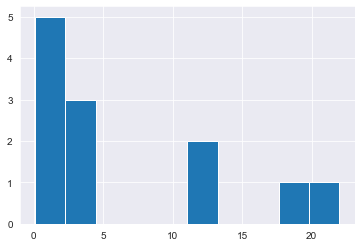

In [375]:
df1_12 = df1[((df1['Demographics Response'] == 'Widowed, divorced, separated') & (df1['Country'] == 'Ukraine'))]
df1_12['Value'].hist()

<AxesSubplot:>

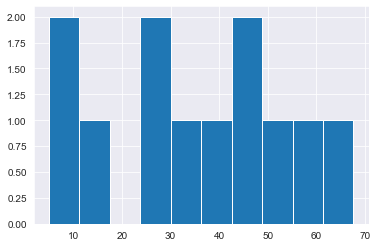

In [376]:
df1_13 = df1[((df1['Demographics Response'] == 'Widowed, divorced, separated') & (df1['Country'] == 'Afghanistan'))]
df1_13['Value'].hist()

<AxesSubplot:>

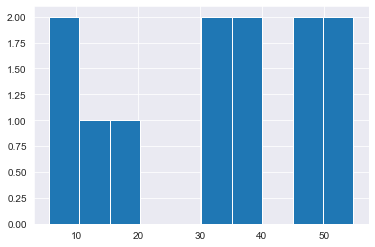

In [377]:
df1_2 = df1[(df1['Demographics Response'] == 'Married or living together') & (df1['Country'] == 'Azerbaijan')]
df1_2['Value'].hist()

<AxesSubplot:>

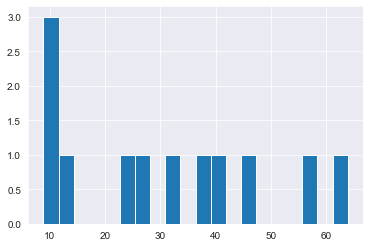

In [378]:
df1_3 = df1[(df1['Demographics Response'] == 'Never married') & (df1['Country'] == 'Azerbaijan')]
df1_3['Value'].hist(bins = 20)

In [379]:
df1['Value'].describe() # посмотрим основную статистику

count    2221.000000
mean       19.878433
std        16.407660
min         0.000000
25%         6.800000
50%        15.500000
75%        29.300000
max        82.100000
Name: Value, dtype: float64

In [380]:
# считаем перцентили
df1_q1 = np.percentile(df1['Value'], 25)
df1_q3 = np.percentile(df1['Value'], 75)
print(df1_q1, df1_q3) 

6.8 29.3


In [381]:
# считаем границы, за пределами которых лежат выбросы
iqr = df1_q3 - df1_q1
iqr_threshold_bottom = df1_q1 - 1.5 * iqr
iqr_threshold_top = df1_q3 + 1.5 * iqr
print(iqr_threshold_bottom, iqr_threshold_top)

-26.95 63.05


In [382]:
# находим выбросы
df1_threshold = df1[df1['Value'] > iqr_threshold_top]
df1_threshold.groupby(['Country'])['Value'].mean().sort_values(ascending = False) # выводим список стран, в которых по семейному положению наивысшее согласие с причинами насилия над женщинами

Country
Eritrea                      74.500000
Afghanistan                  71.975000
Congo Democratic Republic    71.975000
Mali                         71.260000
Guinea                       71.200000
Chad                         70.233333
Tajikistan                   70.100000
Timor-Leste                  69.750000
Burundi                      69.100000
Sierra Leone                 67.900000
Morocco                      66.600000
Ethiopia                     65.100000
Azerbaijan                   63.900000
Name: Value, dtype: float64

<AxesSubplot:>

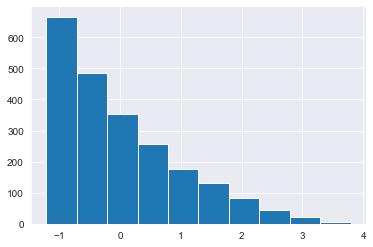

In [383]:
# z-оценка 
df1['z_score'] = scipy.stats.zscore(df1['Value'])
df1['z_score'].hist()

In [384]:
df1 = df1[df1['Value'] < iqr_threshold_top] # избавляемся от выбросов

In [385]:
df1['Demographics Response'].unique() # определяем варианты ответа на семейное положение

array(['Widowed, divorced, separated', 'Married or living together',
       'Never married'], dtype=object)

In [386]:
# создаем отдельные столбцы в датафрейме, которые будут показывать значение value для определенной категории ответов

df1['Value_widowed_divorced_separated'] = df1.apply(lambda row: row['Value'] if row['Demographics Response'] == 'Widowed, divorced, separated' else 'NaN', axis = 1)
df1['Value_married_or_living_together'] = df1.apply(lambda row: row['Value'] if row['Demographics Response'] == 'Married or living together' else 'NaN', axis = 1)
df1['Value_never_married'] = df1.apply(lambda row: row['Value'] if row['Demographics Response'] == 'Never married' else 'NaN', axis = 1)


# так как lambda функция создает тип object, для построения графика его нужно превратить обратно в числовой тип данных
df1['Value_widowed_divorced_separated'] = df1['Value_widowed_divorced_separated'].astype('str').astype('float')
df1['Value_married_or_living_together']= df1['Value_married_or_living_together'].astype('str').astype('float')
df1['Value_never_married'] = df1['Value_never_married'].astype('str').astype('float')

<AxesSubplot:xlabel='Question'>

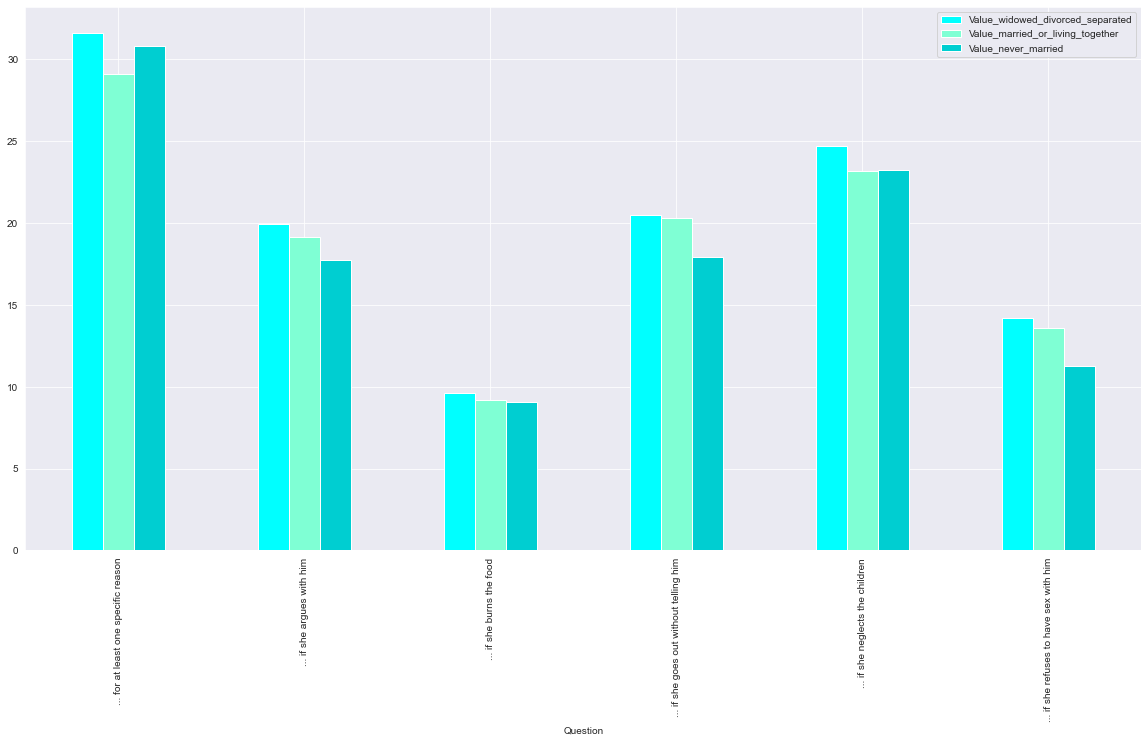

In [387]:
df1.groupby(['Question'])['Value_widowed_divorced_separated', 'Value_married_or_living_together', 'Value_never_married'].mean().plot(kind = 'bar', color = ['#00FFFF', '#7FFFD4', '#00CED1'], figsize = (20,10))


### Вывод: Проведя исследование данных можно прийти к выводу, что категория "вышедших из брака" больше других групп соглашается с причинами насилия над женщинами

## 2. Проведем анализ ответов на вопрос "Education"
### Гипотеза: Менее образованные люди, больше соглашаются с причинами насилия над женщинами

In [388]:
df2['Value'].describe()

count    2942.000000
mean       18.477600
std        16.975465
min         0.000000
25%         5.100000
50%        13.400000
75%        27.500000
max        82.000000
Name: Value, dtype: float64

In [389]:
df2_q1 = np.percentile(df2['Value'], 25)
df2_q3 = np.percentile(df2['Value'], 75)
print(df2_q1, df2_q3)

5.1 27.5


In [390]:
iqr2 = df2_q3 - df2_q1
iqr_threshold_bottom2 = df2_q1 - 1.5 * iqr2
iqr_threshold_top2 = df2_q3 + 1.5 * iqr2
print(iqr_threshold_bottom2, iqr_threshold_top2)

-28.499999999999993 61.099999999999994


In [391]:
df2_threshold = df2[df2['Value'] > iqr_threshold_top2]
df2_threshold.groupby(['Country'])['Value'].mean().sort_values(ascending = False)

Country
Mali                         71.175000
Afghanistan                  71.150000
Eritrea                      70.966667
Chad                         70.650000
Congo Democratic Republic    69.650000
Sierra Leone                 69.300000
Morocco                      68.660000
Ethiopia                     67.800000
Azerbaijan                   67.650000
Gambia                       67.300000
Timor-Leste                  67.235714
Guinea                       66.900000
Tajikistan                   65.325000
Burundi                      64.900000
Tanzania                     63.600000
Niger                        63.200000
Congo                        61.350000
Turkmenistan                 61.300000
Name: Value, dtype: float64

<AxesSubplot:>

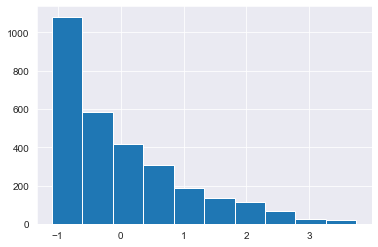

In [392]:
# z-score
df2['z_score'] = scipy.stats.zscore(df2['Value'])
df2['z_score'].hist()

In [393]:
df2 = df2[df2['Value'] < iqr_threshold_top2]
df2

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value,Value_categories,z_score
1,1,Afghanistan,F,Education,Higher,... if she burns the food,2015,10.1,Малый процент согласия,-0.493596
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,2015,13.7,Малый процент согласия,-0.281489
3,1,Afghanistan,F,Education,Primary,... if she burns the food,2015,13.8,Малый процент согласия,-0.275597
13,1,Afghanistan,F,Education,No education,... if she burns the food,2015,19.1,Малый процент согласия,0.036671
16,1,Afghanistan,M,Education,Higher,... if she burns the food,2015,4.5,Малый процент согласия,-0.823540
...,...,...,...,...,...,...,...,...,...,...
12547,280,Zimbabwe,M,Education,Secondary,... if she neglects the children,2015,18.0,Малый процент согласия,-0.028140
12548,350,Zimbabwe,M,Education,Higher,... if she refuses to have sex with him,2015,2.9,Малый процент согласия,-0.917810
12549,350,Zimbabwe,M,Education,No education,... if she refuses to have sex with him,2015,16.2,Малый процент согласия,-0.134193
12550,350,Zimbabwe,M,Education,Primary,... if she refuses to have sex with him,2015,8.6,Малый процент согласия,-0.581974


In [394]:
# df2['Demographics Response'].unique()

df2['Value_higher'] = df2.apply(lambda row: row['Value'] if row['Demographics Response'] == 'Higher' else 'NaN', axis = 1)
df2['Value_secondary'] = df2.apply(lambda row: row['Value'] if row['Demographics Response'] == 'Secondary' else 'NaN', axis = 1)
df2['Value_primary'] = df2.apply(lambda row: row['Value'] if row['Demographics Response'] == 'Primary' else 'NaN', axis = 1)
df2['Value_NoEducation'] = df2.apply(lambda row: row['Value'] if row['Demographics Response'] == 'No education' else 'NaN', axis = 1)



In [395]:
df2['Value_higher'] = df2['Value_higher'].astype('str').astype('float')
df2['Value_secondary']= df2['Value_secondary'].astype('str').astype('float')
df2['Value_primary'] = df2['Value_primary'].astype('str').astype('float')
df2['Value_NoEducation'] = df2['Value_NoEducation'].astype('str').astype('float')

In [396]:
df2.dtypes

RecordID                   int64
Country                   object
Gender                    object
Demographics Question     object
Demographics Response     object
Question                  object
Survey Year                int64
Value                    float64
Value_categories          object
z_score                  float64
Value_higher             float64
Value_secondary          float64
Value_primary            float64
Value_NoEducation        float64
dtype: object

<AxesSubplot:xlabel='Question'>

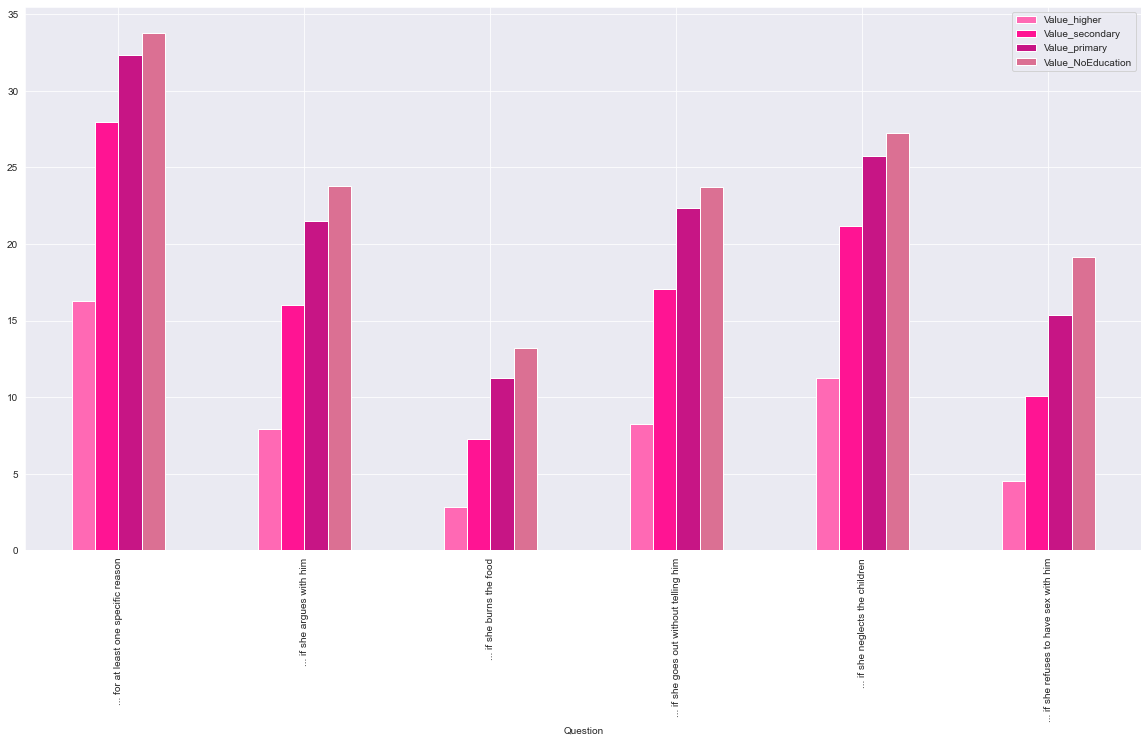

In [397]:
df2.groupby(['Question'])['Value_higher', 'Value_secondary', 'Value_primary', 'Value_NoEducation'].mean().plot(kind = 'bar', color = ['#FF69B4', '#FF1493', '#C71585', '#DB7093'], figsize = (20,10))

### Вывод: Гипотеза подтверждается, менее образованные люди, в среднем в большей степени оправдывают насилие над женщинами

## 3. Проведем анализ ответов на вопрос "Employment"
### Гипотеза: Безработные или Работающие за выгоду, больше соглашаются с причинами насилия над женщинами

In [398]:
df3['Value'].describe()

count    2234.000000
mean       21.169382
std        17.447710
min         0.000000
25%         7.000000
50%        16.400000
75%        30.800000
max        86.900000
Name: Value, dtype: float64

In [399]:
df3_q1 = np.percentile(df3['Value'], 25)
df3_q3 = np.percentile(df3['Value'], 75)
print(df3_q1, df3_q3)

7.0 30.8


In [400]:
iqr3 = df3_q3 - df3_q1
iqr_threshold_bottom3 = df3_q1 - 1.5 * iqr3
iqr_threshold_top3 = df3_q3 + 1.5 * iqr3
print(iqr_threshold_bottom3, iqr_threshold_top3)

-28.700000000000003 66.5


In [401]:
df3_threshold = df3[df3['Value'] > iqr_threshold_top3]
df3_threshold.groupby(['Country'])['Value'].mean().sort_values(ascending = False)

Country
Eritrea                      76.850000
Morocco                      76.780000
Timor-Leste                  75.550000
Afghanistan                  73.600000
Mali                         73.428571
Turkmenistan                 72.600000
Chad                         71.825000
Congo Democratic Republic    71.625000
Ethiopia                     71.300000
Sierra Leone                 70.900000
Guinea                       69.900000
Congo                        68.900000
Tanzania                     68.300000
Gambia                       67.200000
Name: Value, dtype: float64

<AxesSubplot:>

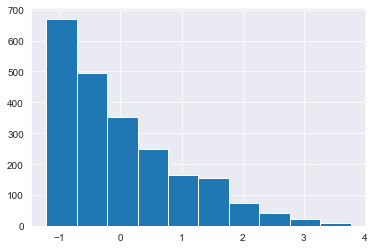

In [402]:
df3['z_score'] = scipy.stats.zscore(df3['Value'])
df3['z_score'].hist()

In [403]:
df3 = df3[df3['Value'] < iqr_threshold_top3]

In [404]:
df3['Demographics Response'].unique()

df3['Value_Employed_for_kind'] = df3.apply(lambda row: row['Value'] if row['Demographics Response'] == 'Employed for kind' else 'NaN', axis = 1)
df3['Value_Unemployed'] = df3.apply(lambda row: row['Value'] if row['Demographics Response'] == 'Unemployed' else 'NaN', axis = 1)
df3['Value_Employed_for_cash'] = df3.apply(lambda row: row['Value'] if row['Demographics Response'] == 'Employed for cash' else 'NaN', axis = 1)

df3['Value_Employed_for_kind'] = df3['Value_Employed_for_kind'].astype('str').astype('float')
df3['Value_Unemployed']= df3['Value_Unemployed'].astype('str').astype('float')
df3['Value_Employed_for_cash'] = df3['Value_Employed_for_cash'].astype('str').astype('float')

<AxesSubplot:xlabel='Question'>

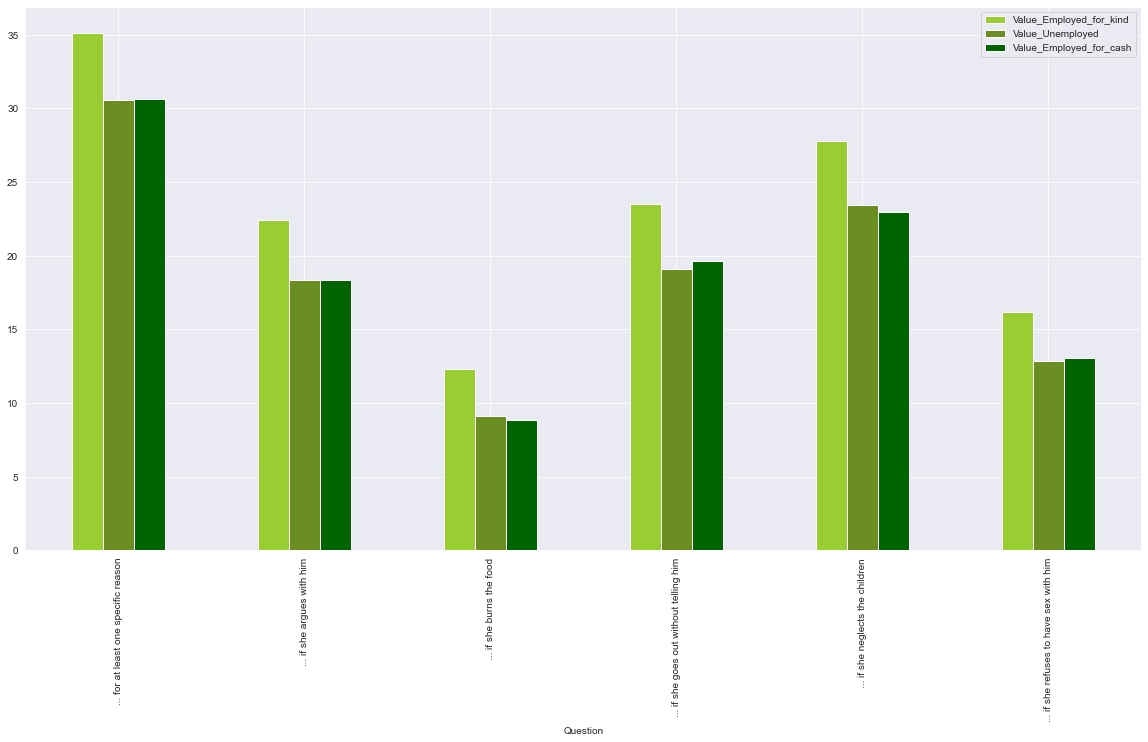

In [405]:
df3.groupby(['Question'])['Value_Employed_for_kind', 'Value_Unemployed', 'Value_Employed_for_cash'].mean().plot(kind = 'bar',color = ['#9ACD32', '#6B8E23', '#006400'], figsize = (20,10))

### Вывод: безработные в среднем на том же уровне согласны с причинами насилия над женщинами, как и обычные рабочие, в то время как работающие за выгоду в большей степени согласны с причинами насилия над женщинами, чем две другие группы

## 4. Проведем анализ ответов на вопрос "Age"
### Гипотеза: Чем моложе респондент, тем больше согласие с причинами насилия над женщинами

In [406]:
df4['Value'].describe()

count    2274.000000
mean       20.041381
std        16.957361
min         0.100000
25%         6.500000
50%        15.200000
75%        29.550000
max        81.500000
Name: Value, dtype: float64

In [407]:
df4_q1 = np.percentile(df4['Value'], 25)
df4_q3 = np.percentile(df4['Value'], 75)
print(df4_q1, df4_q3)

6.5 29.55


In [408]:
iqr4 = df4_q3 - df4_q1
iqr_threshold_bottom4 = df4_q1 - 1.5 * iqr4
iqr_threshold_top4 = df4_q3 + 1.5 * iqr4
print(iqr_threshold_bottom4, iqr_threshold_top4)

-28.075000000000003 64.125


In [409]:
df4_threshold = df4[df4['Value'] > iqr_threshold_top4]
df4_threshold.groupby(['Country'])['Value'].mean().sort_values(ascending = False)

Country
Chad                         73.600000
Afghanistan                  73.300000
Congo Democratic Republic    72.725000
Mali                         71.875000
Eritrea                      70.833333
Timor-Leste                  70.166667
Tajikistan                   68.100000
Guinea                       67.466667
Ethiopia                     65.800000
Sierra Leone                 65.400000
Morocco                      65.000000
Name: Value, dtype: float64

<AxesSubplot:>

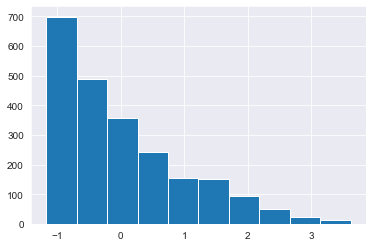

In [410]:
df4['z_score'] = scipy.stats.zscore(df4['Value'])
df4['z_score'].hist()

In [411]:
df4 = df4[df4['Value'] < iqr_threshold_top4]

In [412]:
# df4['Demographics Response'].unique()

df4['Value_Junior'] = df4.apply(lambda row: row['Value'] if row['Demographics Response'] == '15-24' else 'NaN', axis = 1)
df4['Value_Middle'] = df4.apply(lambda row: row['Value'] if row['Demographics Response'] == '25-34' else 'NaN', axis = 1)
df4['Value_Senior'] = df4.apply(lambda row: row['Value'] if row['Demographics Response'] == '35-49' else 'NaN', axis = 1)

df4['Value_Junior'] = df4['Value_Junior'].astype('str').astype('float')
df4['Value_Middle']= df4['Value_Middle'].astype('str').astype('float')
df4['Value_Senior'] = df4['Value_Senior'].astype('str').astype('float')


<AxesSubplot:xlabel='Question'>

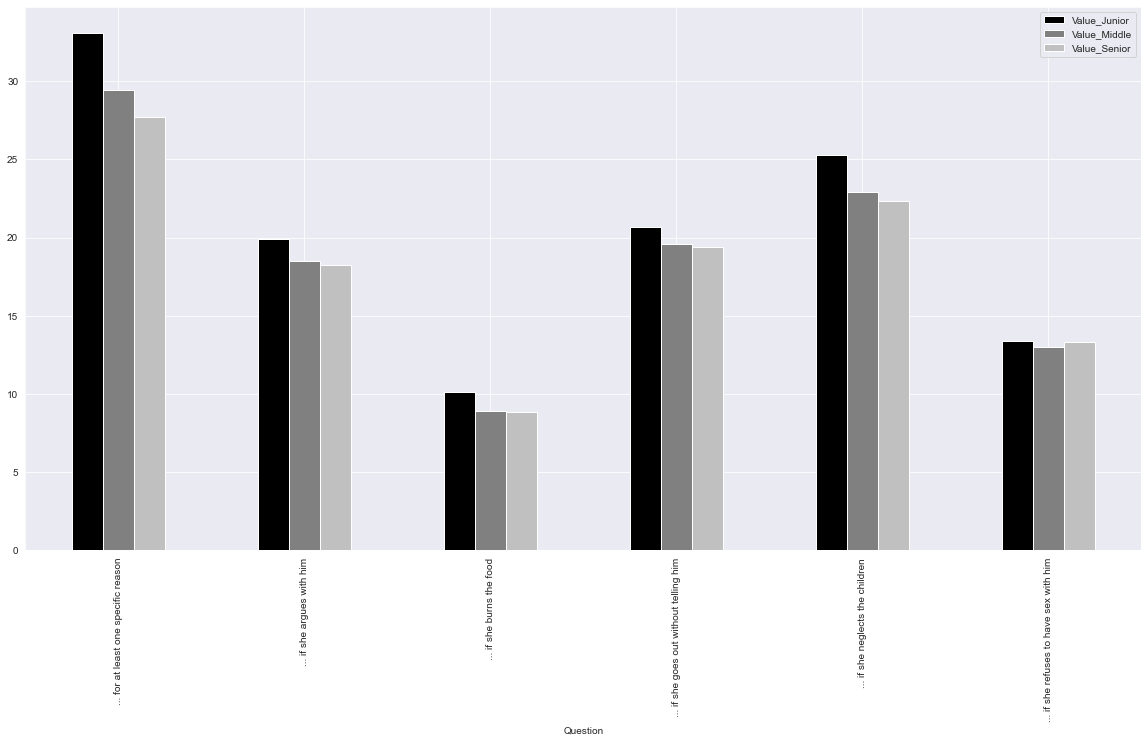

In [413]:
df4.groupby(['Question'])['Value_Junior', 'Value_Middle', 'Value_Senior'].mean().plot(kind = 'bar',color = ['#000000', '#808080', '#C0C0C0'], figsize = (20,10))


### Вывод: гипотеза подтверждена, как видно из графика, более молодое население более согласно с причинами насилия над женщинами

## 5. Проведем анализ ответов на вопрос "Residence"
### Гипотеза: Городское население меньше соглашается с причинами насилия над женщинами

In [414]:
df5['Value'].describe()

count    1516.000000
mean       19.594921
std        17.033095
min         0.100000
25%         6.175000
50%        14.400000
75%        28.400000
max        82.100000
Name: Value, dtype: float64

In [415]:
df5_q1 = np.percentile(df5['Value'], 25)
df5_q3 = np.percentile(df5['Value'], 75)
print(df5_q1, df5_q3)

6.175 28.4


In [416]:
iqr5 = df5_q3 - df5_q1
iqr_threshold_bottom5 = df5_q1 - 1.5 * iqr5
iqr_threshold_top5 = df5_q3 + 1.5 * iqr5
print(iqr_threshold_bottom5, iqr_threshold_top5)

-27.162499999999998 61.7375


In [417]:
df5_threshold = df5[df5['Value'] > iqr_threshold_top5]
df5_threshold.groupby(['Country'])['Value'].mean().sort_values(ascending = False)

Country
Eritrea                      77.900000
Congo Democratic Republic    74.450000
Chad                         73.650000
Afghanistan                  73.420000
Gambia                       72.700000
Morocco                      71.340000
Mali                         70.920000
Guinea                       70.800000
Ethiopia                     69.800000
Timor-Leste                  67.683333
Sierra Leone                 66.600000
Tajikistan                   66.400000
Burundi                      64.000000
Azerbaijan                   62.200000
Niger                        62.100000
Tanzania                     62.100000
Name: Value, dtype: float64

<AxesSubplot:>

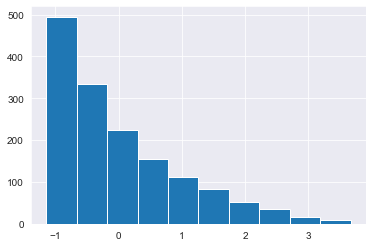

In [418]:
df5['z_score'] = scipy.stats.zscore(df5['Value'])
df5['z_score'].hist()

In [419]:
df5 = df5[df5['Value'] < iqr_threshold_top5]

In [420]:
df5['Demographics Response'].unique()

array(['Rural', 'Urban'], dtype=object)

In [421]:
df5['Value_Rural'] = df5.apply(lambda row: row['Value'] if row['Demographics Response'] == 'Rural' else 'NaN', axis = 1)
df5['Value_Urban'] = df5.apply(lambda row: row['Value'] if row['Demographics Response'] == 'Urban' else 'NaN', axis = 1)

df5['Value_Rural'] = df5['Value_Rural'].astype('str').astype('float')
df5['Value_Urban']= df5['Value_Urban'].astype('str').astype('float')



<AxesSubplot:xlabel='Question'>

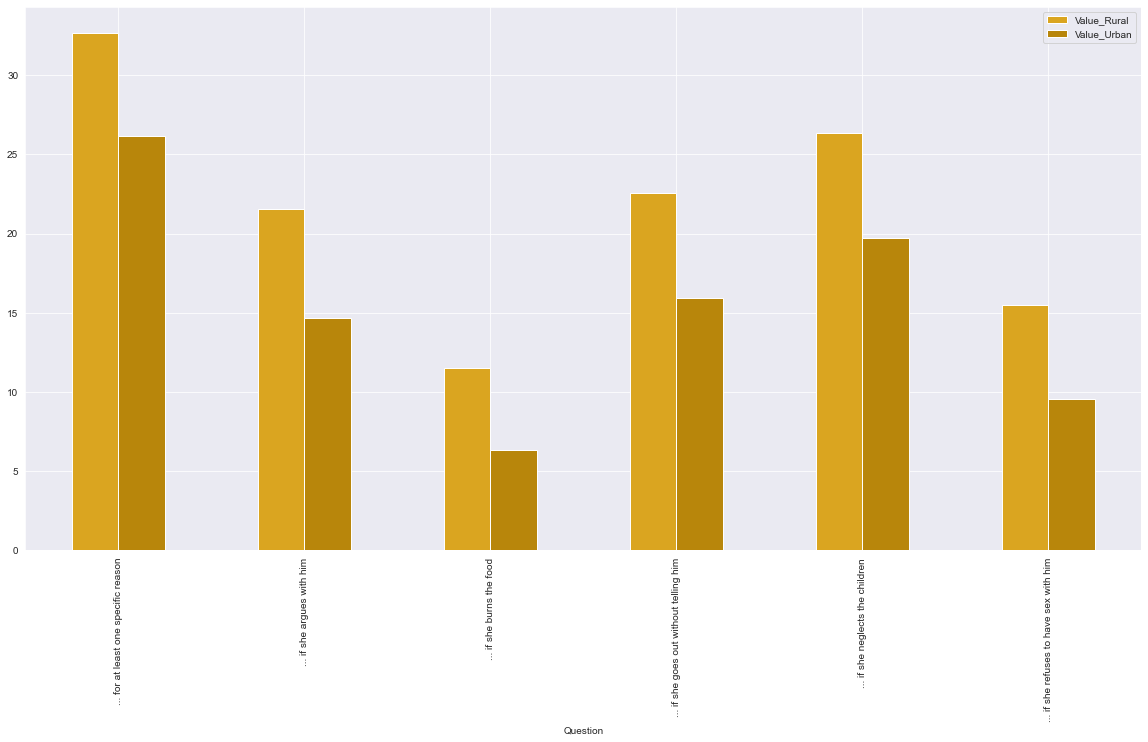

In [422]:
df5.groupby(['Question'])['Value_Rural', 'Value_Urban'].mean().plot(kind = 'bar', color = ['#DAA520', '#B8860B'], figsize = (20,10))


### Вывод: Жители сельской местности больше соглашаются с причинами насилия над женщинами, чем городские жители